# Desiree's scratch pad

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

import Prepare as p
import des_explore as e

import datetime

## Acquire Data

In [2]:
df = pd.read_csv('texas.csv')

In [3]:
df.head(3).T

,0,1,2
AGY,101,104,101
NAME,SENATE ...,LEGISLATIVE BUDGET BOARD ...,SENATE ...
LASTNAME,GILLIAM,GILLIAM,NELSON
FIRSTNAME,STACEY,STACEY,DAVID
MI,L,L,
JOBCLASS,7101,C160,7101
JC TITLE,LEG. OFFICIAL/ADMINISTRATOR ...,COMMITTEE DIRECTOR ...,LEG. OFFICIAL/ADMINISTRATOR ...
RACE,WHITE,WHITE,WHITE
SEX,FEMALE,FEMALE,MALE
EMPTYPE,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME


In [4]:
df = p.prepare_tex(df)

df.head(3).T

,0,1,2
agency_id,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON
firstname,STACEY,STACEY,DAVID
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR
race,WHITE,WHITE,WHITE
sex,FEMALE,FEMALE,MALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00
hours_worked,20.0,20.0,20.0


In [5]:
df.dtypes

agency_id                  int64
agency                    object
lastname                  object
firstname                 object
title                     object
race                      object
sex                       object
emptype                   object
hire_date         datetime64[ns]
hours_worked             float64
monthly_salary           float64
annual_salary            float64
dtype: object

In [6]:
df[df['hire_date'] > pd.to_datetime('now')]

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary


In [7]:
df.loc[df.hire_date=='2069-01-14'].hire_date

Series([], Name: hire_date, dtype: datetime64[ns])

In [8]:
# df = df.drop(index=[794, 118710])

In [9]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


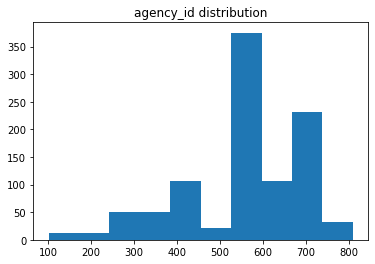

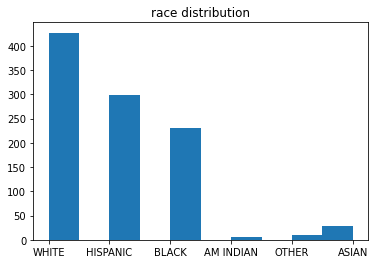

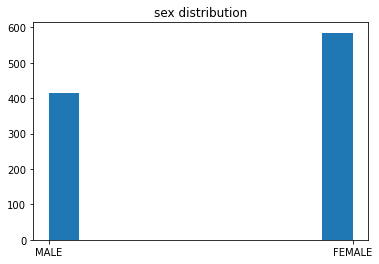

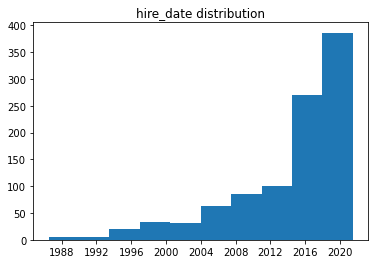

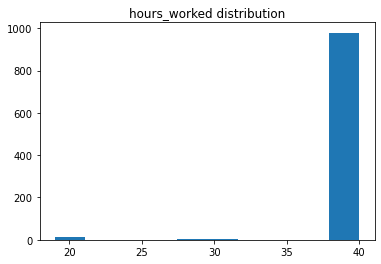

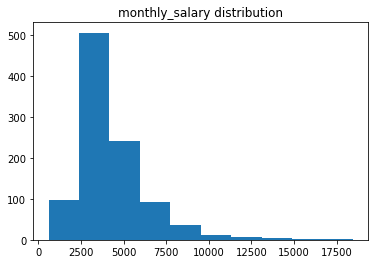

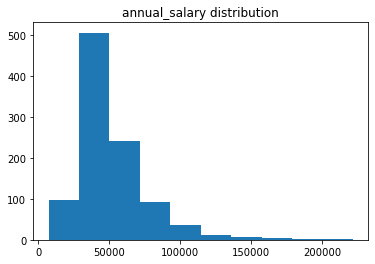

In [10]:
sample = df.drop(columns = ['emptype', 'agency', 'lastname', 'firstname', 'title']).sample(1000)

for col in sample.columns:
        plt.hist(sample[col])
        plt.title(f"{col} distribution")
        plt.show()

In [11]:
column = df.drop(columns = ['agency']).sample(1000).columns

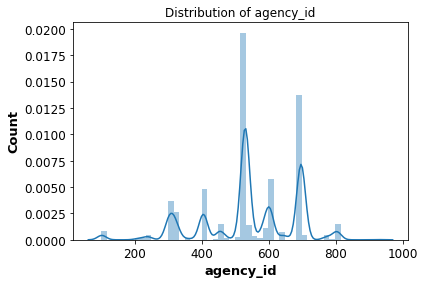

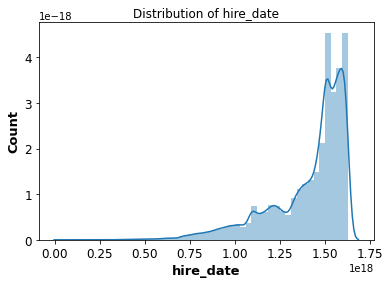

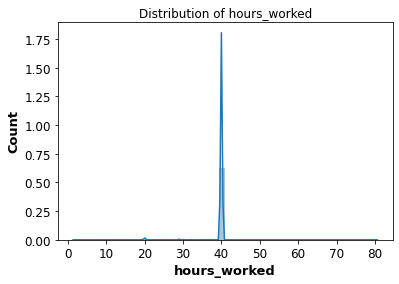

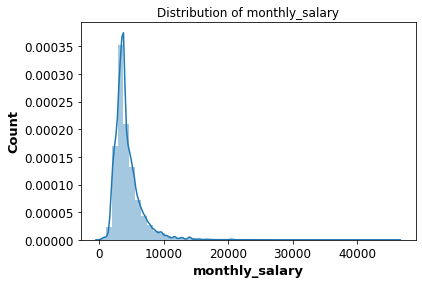

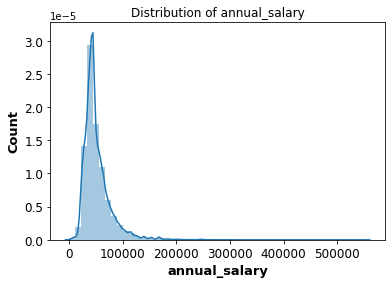

In [12]:
# sample = df.sample(1000)

for i in column:
        if df[i].dtypes != 'object':
            sns.distplot(df[i])
            plt.xticks(fontsize= 12)
            plt.yticks(fontsize=12)
            plt.ylabel("Count", fontsize= 13, fontweight="bold")
            plt.xlabel(i, fontsize=13, fontweight="bold")
            plt.title('Distribution of '+i)
            plt.show()

In [13]:
df.sample(5)

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
5462,302,OFFICE OF THE ATTORNEY GENERAL,GARCIA,ROSA,CHILD SUPPORT OFFCR IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2013-04-22,40.0,3961.42,47537.04
22957,405,DEPARTMENT OF PUBLIC SAFETY,GILLAM,CYNTHIA,PROGRAM SUPERVISOR III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2002-11-01,40.0,5440.43,65285.16
140241,802,PARKS AND WILDLIFE DEPARTMENT,MEYER,ANDREW,GAME WARDEN,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2016-01-11,40.0,5409.91,64918.92
22487,405,DEPARTMENT OF PUBLIC SAFETY,FLORES,RUBEN,LICENSE AND PERMIT SPEC V,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2013-04-01,40.0,4953.24,59438.88
113012,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,FRANKLIN,LACCI,PAROLE OFFCR I,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-09-14,40.0,3475.35,41704.20


In [14]:
df = p.create_features(df)

In [15]:
df.title.str.contains('ELECTED')

0         False
1         False
2         False
3         False
4         False
          ...  
144733    False
144734    False
144735    False
144736    False
144737    False
Name: title, Length: 144730, dtype: bool

In [16]:
df['elected_official'] = np.where(df.title.str.contains('ELECTED'), 1, 0)

In [17]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,is_director,is_unclassified,is_parttime,elected_official
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,0,0,5,96,8.0,0,0,1,1,0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,0,5,44,3.7,0,1,1,1,0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,0,0,5,271,22.6,0,0,1,1,0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,0,5,44,3.7,0,0,1,1,0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,0,1,3,218,18.2,0,0,1,0,0


In [18]:
df[df.title == 'ELECTED OFFICIAL']

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,is_director,is_unclassified,is_parttime,elected_official
89,101,SENATE,ALVARADO,CAROL,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2018-12-21,40.0,...,0,1,3,30,2.5,1,0,1,0,1
117,101,SENATE,BETTENCOURT,PAUL,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2015-01-13,40.0,...,0,0,5,78,6.5,1,0,1,0,1
121,101,SENATE,BIRDWELL,BRIAN,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2010-07-02,40.0,...,0,0,5,132,11.0,1,0,1,0,1
122,101,SENATE,BLANCO,CESAR,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2021-01-12,40.0,...,0,1,3,6,0.5,1,0,1,0,1
144,101,SENATE,BUCKINGHAM,DAWN,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,0,0,5,54,4.5,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,102,HOUSE OF REPRESENTATIVES,WALLE,ARMANDO,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2009-01-13,40.0,...,0,1,3,150,12.5,1,0,1,0,1
1478,102,HOUSE OF REPRESENTATIVES,WHITE,JAMES,ELECTED OFFICIAL,BLACK,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2011-01-11,40.0,...,1,1,2,126,10.5,1,0,1,0,1
1498,102,HOUSE OF REPRESENTATIVES,WILSON JR,TERRY,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,0,0,5,54,4.5,1,0,1,0,1
1505,102,HOUSE OF REPRESENTATIVES,WU,EUGENE,ELECTED OFFICIAL,ASIAN,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2013-01-08,40.0,...,0,1,1,102,8.5,1,0,1,0,1


In [19]:
df.title.value_counts()

CORREC  OFFICER IV                8753
CORREC  OFFICER V                 7350
TEXAS WORKS ADVISOR II            3812
CORREC OFFCR III                  3652
DIRECT SUPPORT PROFESSIONAL I     2483
                                  ... 
21 SYSTEMS ADMINISTRATOR III         1
COMMISSIONER, DSHS                   1
WEB CONTENT EDITOR                   1
RESEARCH SPECIALIST III              1
COMMISS, CANADIAN RIVER COMPAC       1
Name: title, Length: 1406, dtype: int64

In [20]:
df[df.title.str.contains('ELECTED')].title.value_counts()

ELECTED OFFICIALS STAFF    597
ELECTED OFFICIAL           181
Name: title, dtype: int64

Looking At Our Maximum Age and Minimum Age to Make Some Age Bins

Max: 49.8, Min: 0.0

----------------------------

Visualizing Years of Tenure Column To Help with Binning



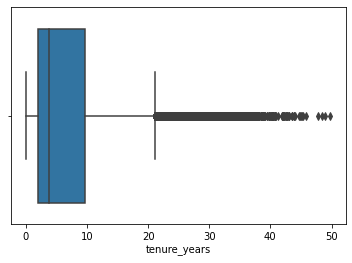


----------------------------

Looking At Our Years of Tenure Bins Value Counts
1    83012
2    27330
3    25513
4     8875
Name: tenure_years_bins, dtype: int64

----------------------------



In [21]:
df = p.make_bins_and_feats(df)

In [22]:
df.head().T

,0,1,2,3,4
agency_id,101,104,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON,NELSON,ROCHA
firstname,STACEY,STACEY,DAVID,DAVID,MARIE
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR,SENIOR BUDGET ADVISOR,LEG. SERVICE/MAINTENANCE
race,WHITE,WHITE,WHITE,WHITE,HISPANIC
sex,FEMALE,FEMALE,MALE,MALE,FEMALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URF - UNCLASSIFIED REGULAR FULL-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00,2017-11-01 00:00:00,2003-05-01 00:00:00
hours_worked,20.0,20.0,20.0,20.0,41.0


In [23]:
df[df.title.str.contains('DIRECTOR')].title.value_counts()

DIRECTOR II                       804
DIRECTOR III                      620
DIRECTOR I                        504
DIRECTOR IV                       379
DIRECTOR VI                       200
DIRECTOR V                        165
DEPUTY DIRECTOR I                  93
DIRECTOR VII                       59
EXECUTIVE DIRECTOR                 43
DEPUTY DIRECTOR II                 24
DIRECTOR                           22
ASSISTANT DIRECTOR                 18
SENIOR DIRECTOR                    18
DEPUTY DIRECTOR III                14
SENIOR MANAGING DIRECTOR            7
DEPUTY DIRECTOR IV                  5
PROGRAM DIRECTOR                    3
DEPUTY DIRECTOR                     3
REVIEW DIRECTOR                     2
COMMITTEE DIRECTOR                  2
EXEC DIRECTOR, VETERANS COMM        1
DEPUTY DIRECTOR/CFO                 1
DIRECTOR, STATE LAW LIBRARY         1
ADMINSTRATIVE DIRECTOR              1
DIRECTOR, DEPARTMENT OF PUBLIC      1
EXEC DIRECTOR                       1
EXECUTIVE DI

In [24]:
df[df.hours_worked==40].emptype.value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME        137253
URF - UNCLASSIFIED REGULAR FULL-TIME        2545
CTF - CLASSIFIED TEMPORARY FULL-TIME        1273
ERF - EXEMPT REGULAR FULL-TIME               928
UTF - UNCLASSIFIED TEMPORARY FULL-TIME        76
Name: emptype, dtype: int64

In [25]:
df[df.hours_worked<40].emptype.value_counts()

CRP - CLASSIFIED REGULAR PART-TIME        1615
URP - UNCLASSIFIED REGULAR PART-TIME       931
CTP - CLASSIFIED TEMPORARY PART-TIME        84
UTP - UNCLASSIFIED TEMPORARY PART-TIME      23
Name: emptype, dtype: int64

In [26]:
df[df.hours_worked<40].annual_salary.mean(), df[df.hours_worked==40].annual_salary.mean()

(41646.609362987205, 52019.292607694646)

Salary distribution of part time versus full time


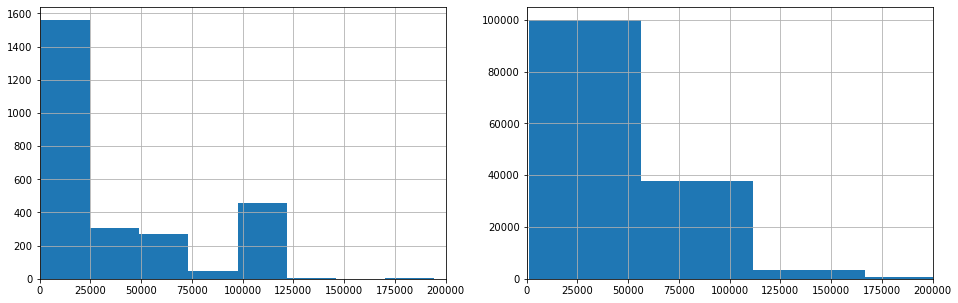

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(121)
df[df.hours_worked<40].annual_salary.hist()
plt.xlim(0,200000)
plt.subplot(122)
df[df.hours_worked==40].annual_salary.hist()
plt.xlim(0,200000)
print('Salary distribution of part time versus full time');

<AxesSubplot:>

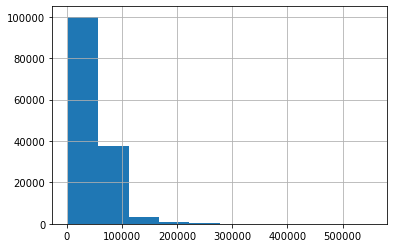

In [28]:
df[df.hours_worked==40].annual_salary.hist()

In [29]:
df.dtypes

agency_id                     int64
agency                       object
lastname                     object
firstname                    object
title                        object
race                         object
sex                          object
emptype                      object
hire_date            datetime64[ns]
hours_worked                float64
monthly_salary              float64
annual_salary               float64
is_female                     int64
is_white                      int64
is_hispanic                   int64
is_black                      int64
is_BIPOC                      int64
race_encoded                  int64
tenure_months                 int64
tenure_years                float64
is_elected                    int64
is_director                   int64
is_unclassified               int64
is_parttime                   int64
elected_official              int64
tenure_years_bins             int64
0-5_years                     int64
5-10_years                  

In [30]:
# split our data
train, validate, test = p.split_data(df)

Making Sure Our Shapes Look Good
Train: (81048, 30), Validate: (34736, 30), Test: (28946, 30)


## Statistics Tests
### Goals
- Comparing means of female vs male salaries
- Comparing means based on departments
- Comparing means of race
- White vs BIPOC
- One race vs full sample
- BIPOC vs full sample
- Salaries higher for newer hire dates?


**We will conduct a two sample two tailed ttest to compare the average salaries of males versus females**
\
$H_0$ = The average salary of females == The average salary of males
\
$H_a$ = The average salary of females is significantly different than the average salary of males

In [31]:
# with a 95% confidence interval, we set our alpha to 0.05
alpha = 0.05

# set up our samples
sample1 = train[train.sex=='FEMALE'].annual_salary
sample2 = train[train.sex=='MALE'].annual_salary

# now let's take a look at the variance to verify the variance between the two samples
sample1.var(), sample2.var()

(532840192.1955485, 814917248.4519943)

In [40]:
# assign t and p value
t, p = stats.ttest_ind(sample1, sample2, equal_var=False)


if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


**We fail to reject the null hypothesis which means there is statistically a significant difference between the salaries of women versus men**

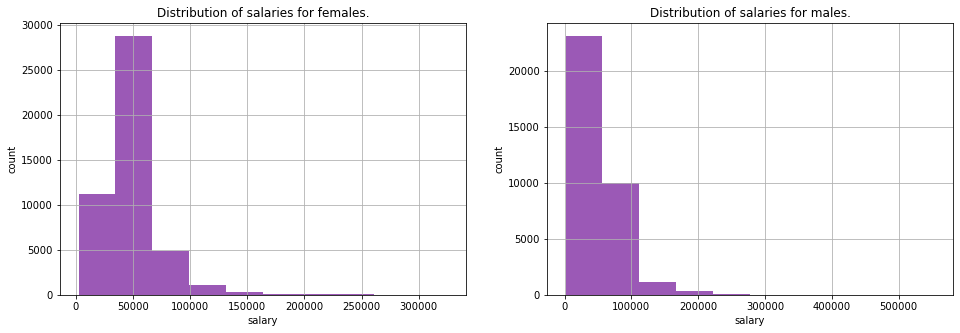

In [60]:
# take a look at salary distribution per gender
plt.figure(figsize=(16,5))
plt.subplot(121)
sample1.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for females.')
plt.subplot(122)
sample2.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for males.');

In [43]:
train.sample(3).T

,83819,127084,78450
agency_id,537,696,530
agency,DEPARTMENT OF STATE HEALTH SERVICES,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES
lastname,ROBLES,PINON,ROSENFIELD
firstname,MIRIAM,JOSHUA,VALEA
title,PROGRAM SUPERVISOR VI,FOOD SRVC MGR III,CHILD PROTECTIVE SVCS SPEC I
race,HISPANIC,HISPANIC,OTHER
sex,FEMALE,MALE,FEMALE
emptype,CRF - CLASSIFIED REGULAR FULL-TIME,CRF - CLASSIFIED REGULAR FULL-TIME,CRF - CLASSIFIED REGULAR FULL-TIME
hire_date,2009-12-01 00:00:00,2013-10-17 00:00:00,2021-06-21 00:00:00
hours_worked,40.0,40.0,40.0


In [44]:
# df.to_csv('capstone.csv')

**Now will conduct a two sample one tailed ttest to compare the average salaries of elected officials versus non elected officials**
\
$H_0$ = The average salary of elected officials == The average salary of non elected officials
\
$H_a$ = The average salary of elected officials > The average salary of non elected officials

In [45]:
df.is_unclassified.value_counts()

0    141154
1      3576
Name: is_unclassified, dtype: int64

In [48]:
# set up our alpha with a confidence interval of 95%
alpha = 0.05

# set up our samples
elected = train[train.is_elected==1].annual_salary
non_elected = train[train.is_elected==0].annual_salary

# take a look at the variance
elected.var(), non_elected.var()

(6990687667.486143, 650741485.6095672)

In [50]:
# assign t and p value
t, p = stats.ttest_ind(non_elected, elected, equal_var=False)


if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


**This tells us that it is unlikely elected officials make more annually than non elected officials**

Distribution of salaries for elected official versus non elected employees.


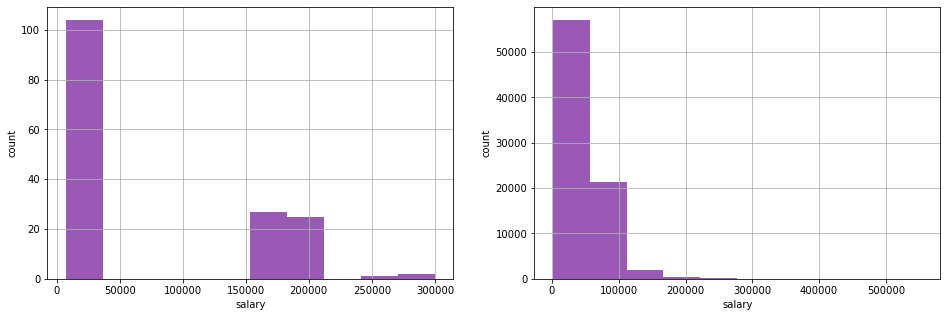

In [62]:
plt.figure(figsize=(16,5))
plt.subplot(121)
elected.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.subplot(122)
non_elected.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
print('Distribution of salaries for elected official versus non elected employees.');

**Now will conduct a two sample one tailed ttest to compare the average salaries of employees with a title that has director in it**
\
$H_0$ = The average salary of director titles == The average salary of employees without director titles
\
$H_a$ = The average salary of director titles > The average salary of employees without director titles

In [53]:
train.is_director.value_counts()

0    79346
1     1702
Name: is_director, dtype: int64

In [54]:
# set up our alpha with a confidence interval of 95%
alpha = 0.05

# set up our samples
director = train[train.is_director==1].annual_salary
non_director = train[train.is_director==0].annual_salary

# take a look at the variance
director.var(), non_director.var()

(1296693241.4069114, 534733833.7603683)

In [58]:
# assign t and p value
t, p = stats.ttest_ind(non_director, director, equal_var=False)


if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


**Another interesting find that officials with director in their title do not appear to make more than employees with regular titles**

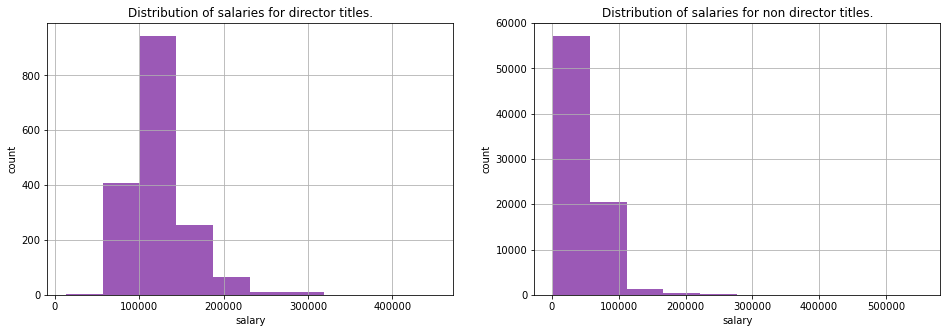

In [63]:
# take a look at salary distribution
plt.figure(figsize=(16,5))
plt.subplot(121)
director.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for director titles.')
plt.subplot(122)
non_director.hist(color='#9b59b6')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Distribution of salaries for non director titles.');

**Next we will conduct a two sample one tailed ttest to compare the average salaries of employees with classified jobs**
\
$H_0$ = The average salary of employees with classified jobs == The average salary of employees with unclassified jobs
\
$H_a$ = The average salary of employees with classified jobs > The average salary of employees with unclassified jobs

In [64]:
# set up our alpha with a confidence interval of 95%
alpha = 0.05

# set up our samples
classified = train[train.is_unclassified==0].annual_salary
unclassified = train[train.is_unclassified==1].annual_salary

classified.var(), unclassified.var()

(623327307.3812659, 1953827494.3648906)